<a href="https://colab.research.google.com/github/Kumkum24/NYC-Taxin-Trip-Predection/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## Importing Required Libraries and Modules

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import warnings; warnings.simplefilter('ignore')
import klib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from math import sin, cos, sqrt, atan2, radians

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_f=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capston project/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv")

In [ ]:
df_f.shape

(1458644, 11)

In [ ]:
df_f.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df_f.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


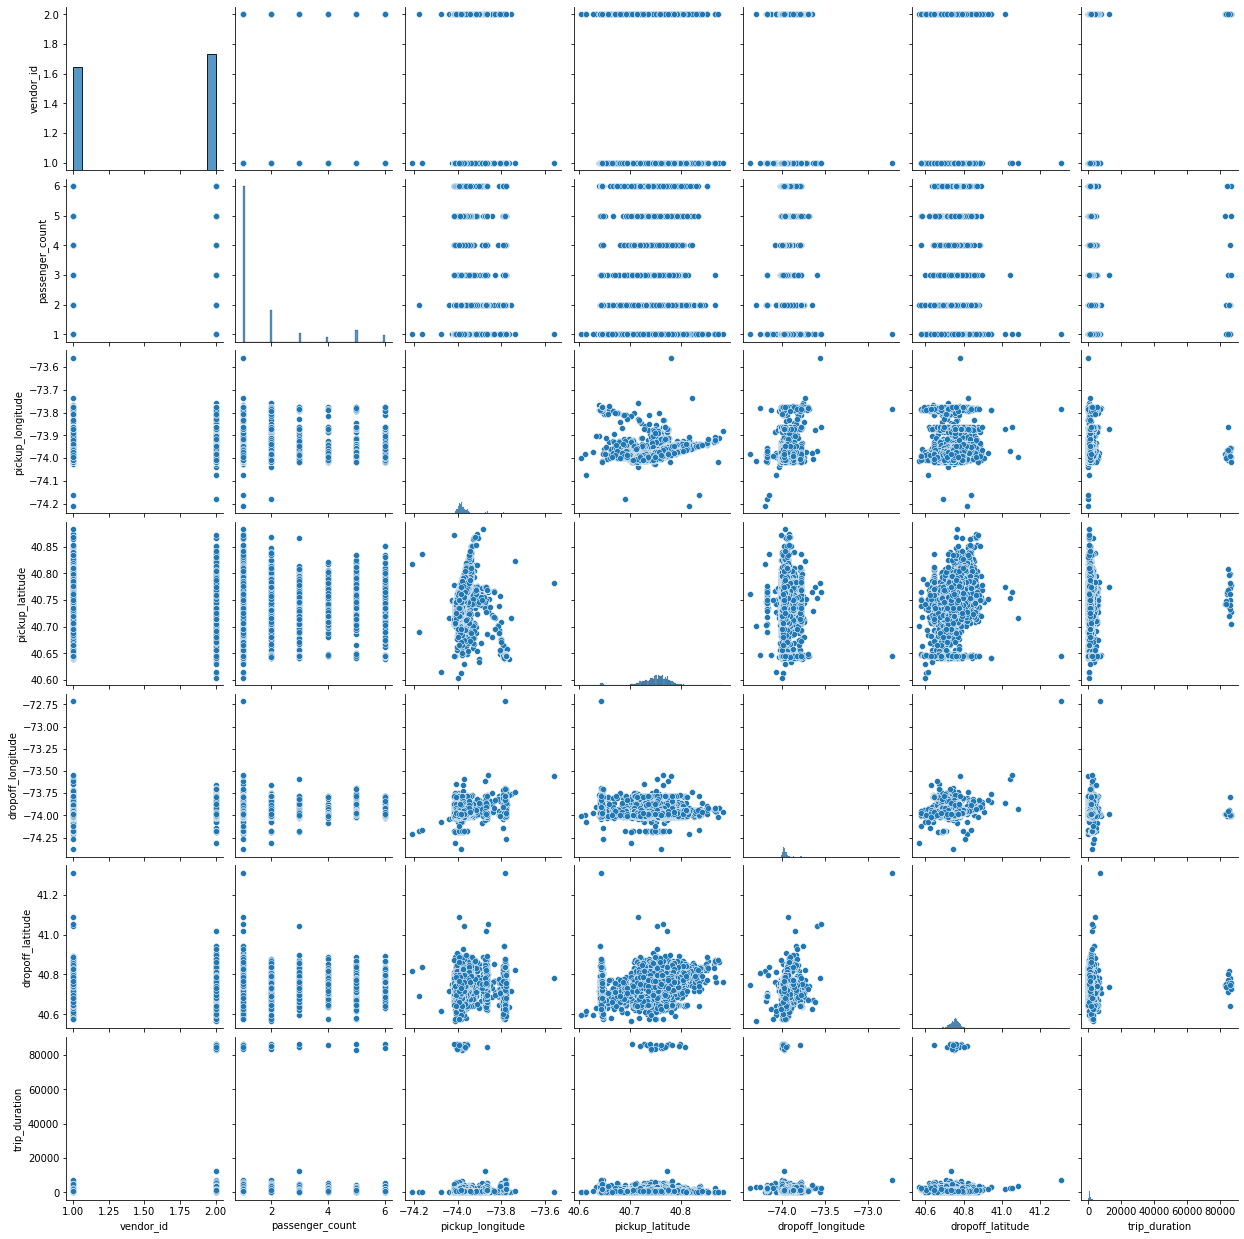

In [ ]:
sns.pairplot(data=df_f.head(20000))

GridSpec(6, 4)

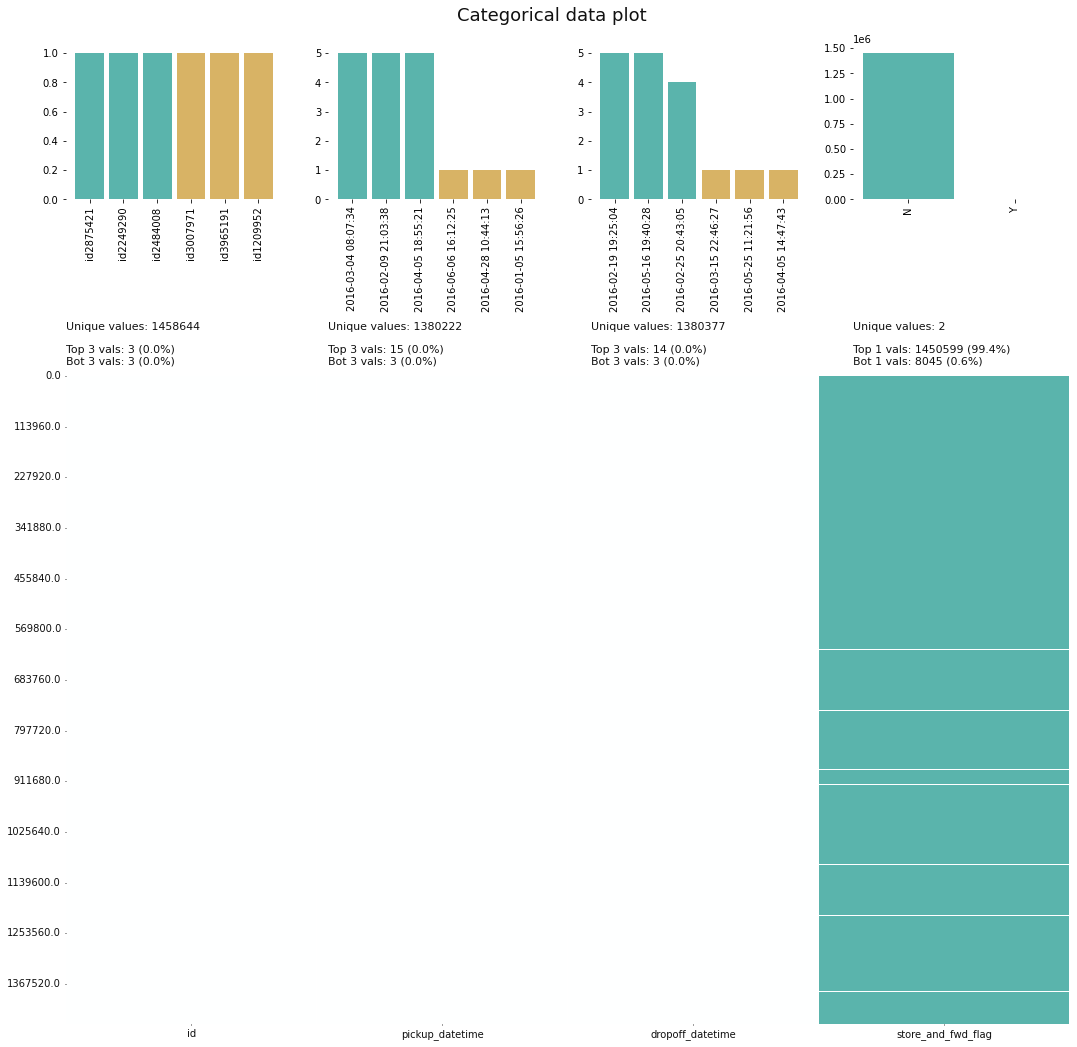

In [ ]:
klib.cat_plot(df_f)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


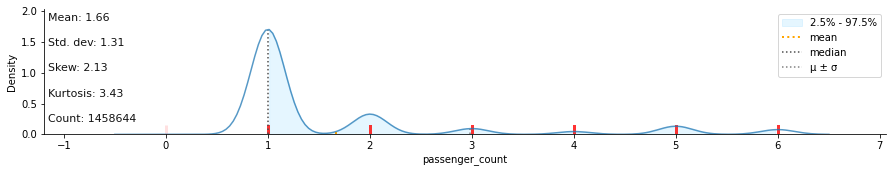

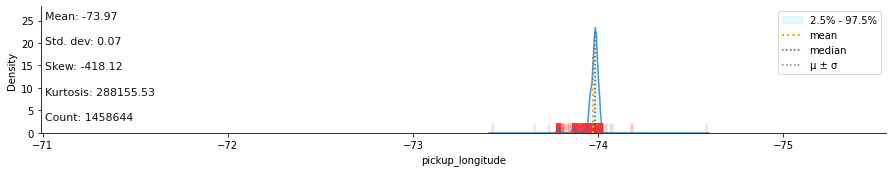

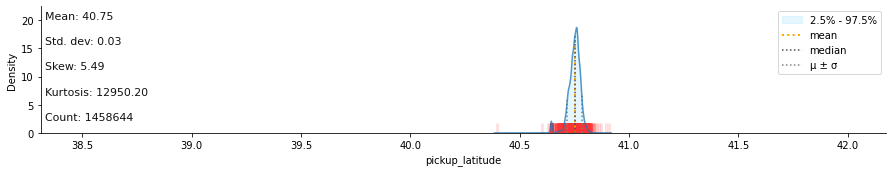

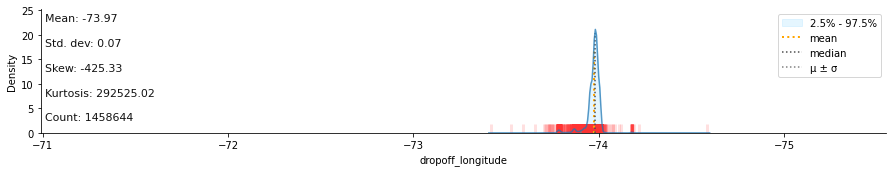

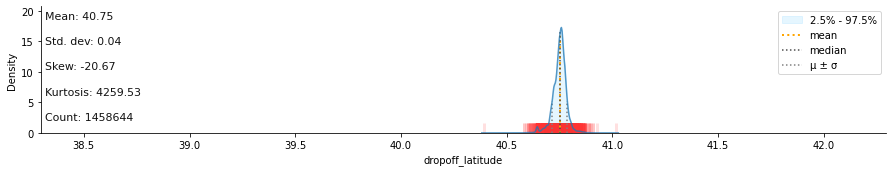

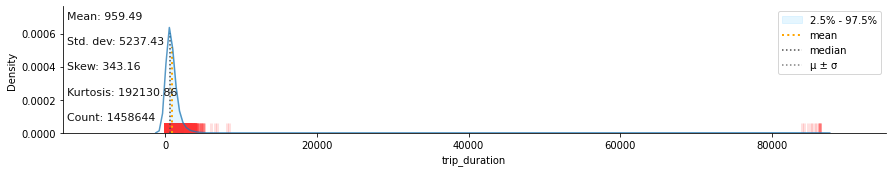

In [ ]:
klib.dist_plot(df_f)

# Exploratory Data Analysis

## Cleaning Lattitude and longitude

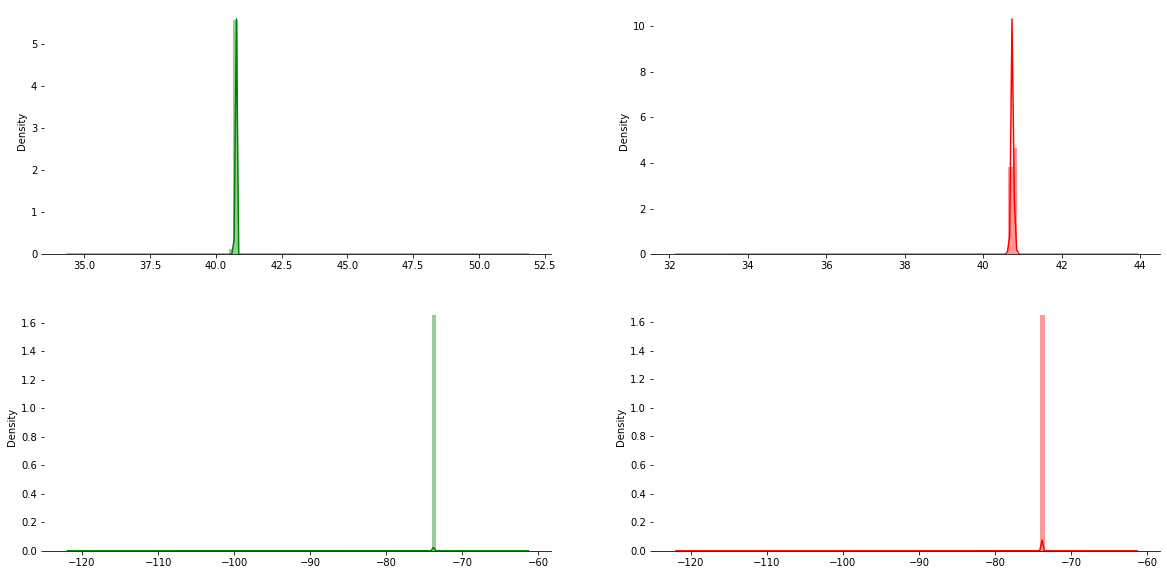

In [ ]:
# Plot a univariate distribution of observations for latitude and longitude values to get a sense of where the most of the rides
# are concentrated in terms of location.
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_f['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(df_f['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(df_f['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(df_f['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])

The above plots shows us that most of the rides are centered around the following coordinates:

Latitude: 40 to 41

Longitude: -73 to -74

If we see from the means of the latitude and longitude values that we derived above, we see that these values are correct. Also, if we check out these coordinates on a map, we get that the coordinates of (40.7128, 74.0060) correspond to that of NYC. Hence, our plot is correct.

One anomaly that we see here is that some of the trips that are from some other lat like 32 to 44 are taking a very long time and hence effecting the plot as such. These values are outliers and in the next step, we'll provide the bounds for the coordinates so as to remove these outliers.

Also, we see that the two vendors are positive correlated with the pickup and dropoff latitude and longitude as well. This means that they only operate in this region.

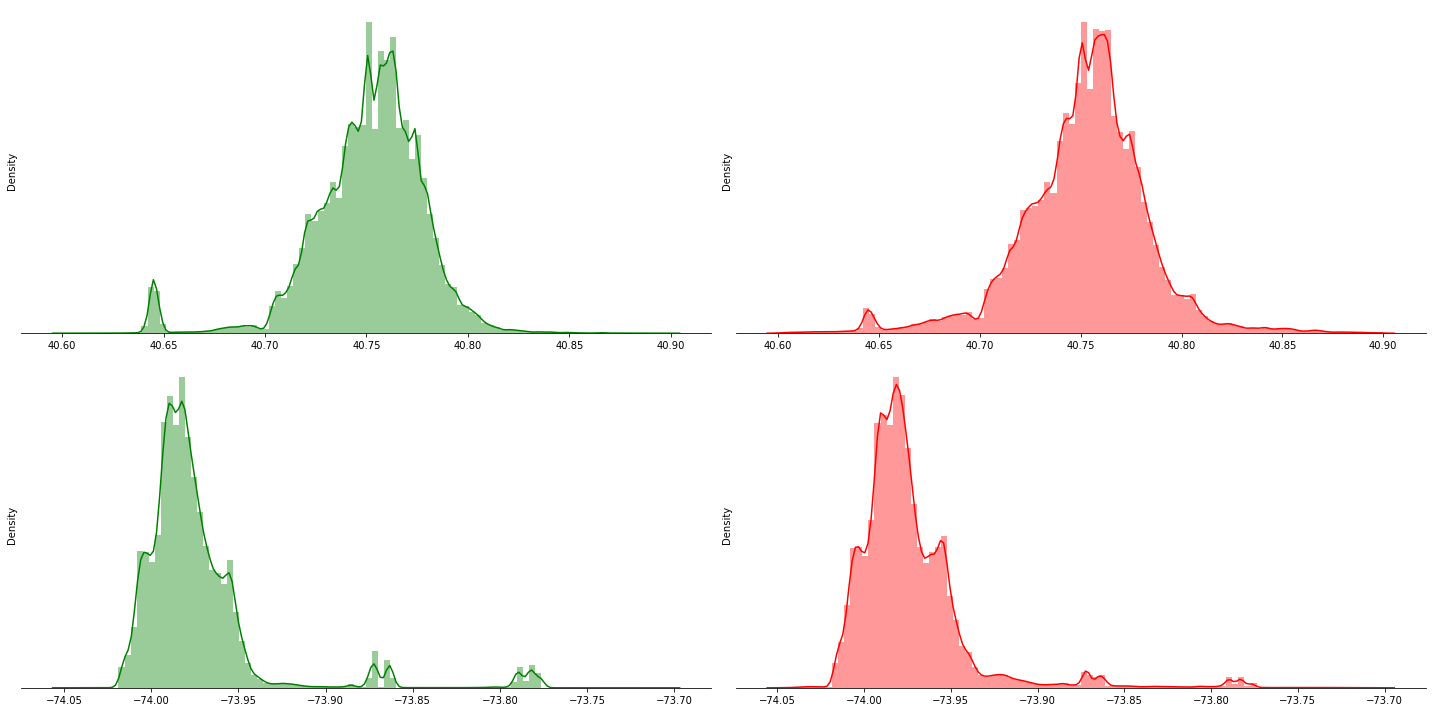

In [ ]:
# Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df_f = df_f.loc[(df_f.pickup_latitude > 40.6) & (df_f.pickup_latitude < 40.9)]
df_f = df_f.loc[(df_f.dropoff_latitude > 40.6) & (df_f.dropoff_latitude < 40.9)]
df_f = df_f.loc[(df_f.pickup_longitude > -74.05) & (df_f.pickup_longitude < -73.7)]
df_f = df_f.loc[(df_f.dropoff_longitude > -74.05) & (df_f.dropoff_longitude < -73.7)]

# Plot the distribution plot again with the same values but this time with the bounds in place for coordinates
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_f['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(df_f['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(df_f['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(df_f['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])
plt.setp(ax, yticks=[])
plt.tight_layout()

###### After Cleaning Lattitude and longitude we can clearly see most of the trip occur arround 40.7128, 74.0060 region

# Extracting Distance Using Longitude and lattitude 

In [ ]:
pd.pandas.set_option('display.max_columns', None)


In [ ]:
# approximate radius of earth in km
def distance_s_ll(pic_lat,pic_lon,drop_lat,drop_lon):
    origin = (pic_lat, pic_lon)  # (latitude, longitude) 
    dist =   (drop_lat,drop_lon)
    return geodesic(origin, dist).kilometers

In [ ]:
df_f['distance']=df_f.apply(lambda x: distance_s_ll(x['pickup_latitude'],x['pickup_longitude'],
                        x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [ ]:
df_f.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660


We got the distance in KM

# Cleaning date and time and extracting information from it
Exracting 

1.Pickup Day and dropoff day (Monday as 0 to Sunday as 6)

2.Pickup Hour and dropoff hour(0 to 24)

3.Pickup month and dropoff month(1 to 12)

In [ ]:
df_f['pickup_datetime']=pd.to_datetime(df_f['pickup_datetime'])
df_f['dropoff_datetime']=pd.to_datetime(df_f['dropoff_datetime'])


In [ ]:
df_f['pickup_day']=df_f['pickup_datetime'].dt.day_name()
df_f['dropoff_day']=df_f['dropoff_datetime'].dt.day_name()

df_f['pickup_day']=df_f['pickup_datetime'].dt.weekday
df_f['dropoff_day']=df_f['dropoff_datetime'].dt.weekday

df_f['pickup_hour']=df_f['pickup_datetime'].dt.hour
df_f['dropoff_hour']=df_f['dropoff_datetime'].dt.hour

df_f['pickup_month']=df_f['pickup_datetime'].dt.month
df_f['dropoff_month']=df_f['dropoff_datetime'].dt.month



In [ ]:
df_f.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,0,0,17,17,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,6,6,0,0,6,6


# Extracting day part from day hour
Converting Day hour into the Day part(Morning,Afternoon,Evening,Late Night) 

In [ ]:
def day_part(x):
    if x in range(6,12):
        return('Morning')
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'

In [ ]:
df_f['pickup_timeofday']=df_f['pickup_hour'].apply(day_part)
df_f['dropoff_timeofday']=df_f['dropoff_hour'].apply(day_part)

In [ ]:
df_f.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,6,6,0,0,6,6,Late Night,Late Night


we will only take afternoon(yes or no) in the day part as mean time is high

In [ ]:
def afternoon_to_yn(data):
    if data=='Afternoon':
        return 1;
    else:
        return 0;

we will only take afternoon(yes or no) in the day part as mean time is high

In [ ]:
#
df_f['pick_afternoon']=df_f.apply(lambda x: afternoon_to_yn(x['pickup_timeofday']),axis=1)

we will only take sunday(yer or no) in days as the mean trip time is high

In [ ]:
def sun_or_not_drop(data):
    if data==6:
        return 1;
    else:
        return 0;

In [ ]:
df_f['drop_on_sunday']=df_f.apply(lambda x: sun_or_not_drop(x['dropoff_day']),axis=1)

In [ ]:
def sat_or_not_pick(data):
    if data==5:
        return 1;
    else:
        return 0;

In [ ]:

df_f['pick_on_saturday']=df_f.apply(lambda x: sat_or_not_pick(x['pickup_day']),axis=1)

checking Distance Distribution


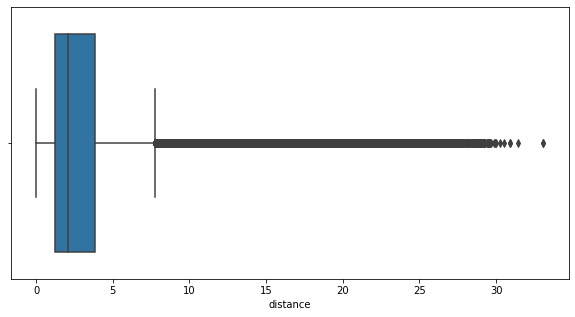

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df_f.distance)

Removing outlier using quartile method

In [ ]:
#
Q1=  np.percentile(df_f['distance'], 25)
Q2 = np.percentile(df_f['distance'], 50)  
Q3 = np.percentile(df_f['distance'], 75)
IQR = Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df_f=df_f[(df_f['distance']>0.2) & (df_f['distance']<upper_limit)]  

distance after removing outlier

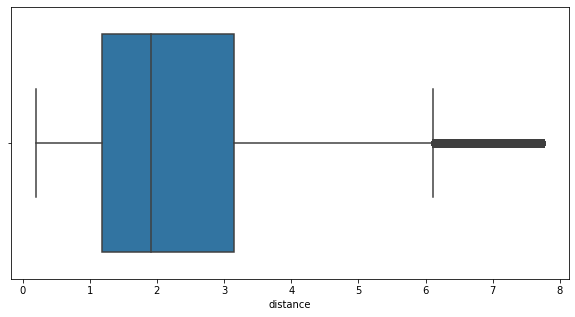

In [ ]:
#
plt.figure(figsize=(10,5))
sns.boxplot(df_f.distance)

creating a new feature Speed usind Distance and Time

In [ ]:
df_f['speed_kmph']=(df_f.distance/(df_f.trip_duration/3600))

cheking Speed Distribution

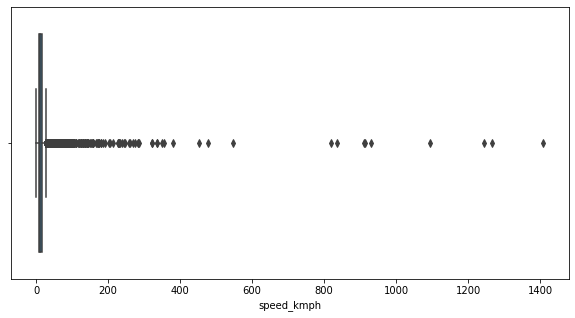

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(df_f.speed_kmph)

Removing outlier using From Speed quartile method

In [ ]:
#
Q1=  np.percentile(df_f['speed_kmph'], 25)
Q2 = np.percentile(df_f['speed_kmph'], 50)  
Q3 = np.percentile(df_f['speed_kmph'], 75)
IQR = Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)


df_f=df_f[(df_f['speed_kmph']>0.2) & (df_f['speed_kmph']<upper_limit)]  

speed after Removing Outlier

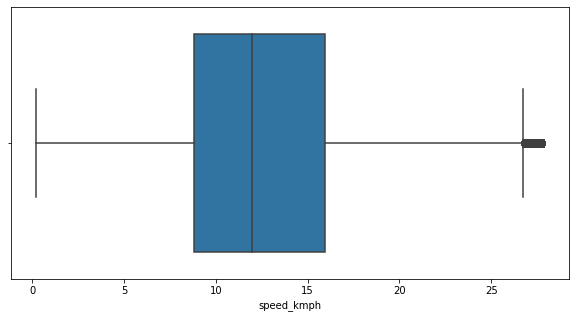

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(df_f.speed_kmph)

Checking Distriution of Trip Duration

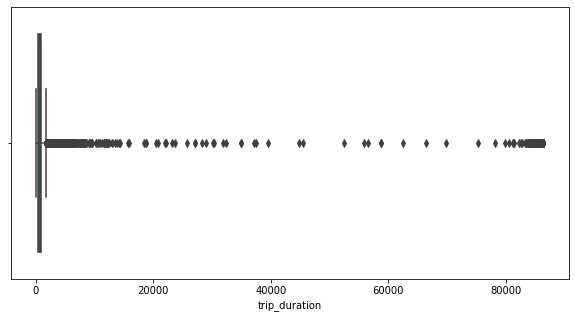

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df_f.trip_duration)

Removing outlier from Trip Duration using quartile method

In [ ]:

Q1=  np.percentile(df_f['trip_duration'], 25)
Q2 = np.percentile(df_f['trip_duration'], 50)  
Q3 = np.percentile(df_f['trip_duration'], 75)
IQR = Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
lower_limit,upper_limit
df_f=df_f[(df_f['trip_duration']>lower_limit) & (df_f['trip_duration']<upper_limit)] 

Trip_duration after removing outlier

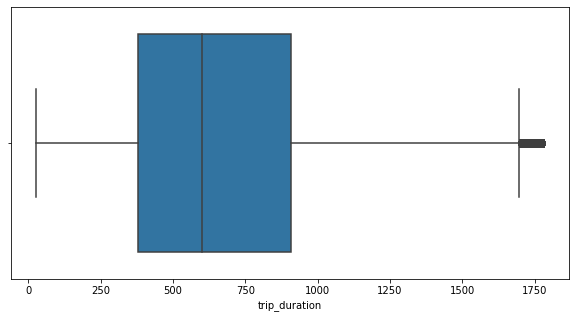

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(df_f.trip_duration)

Analysing Trip Duration Data

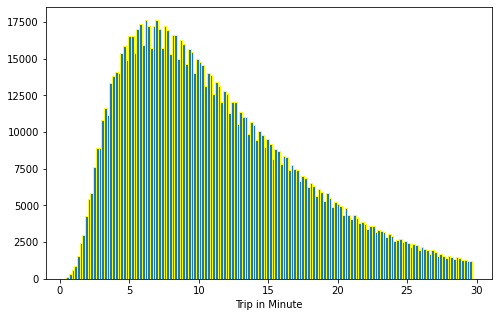

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('Trip in Minute')

plt.hist(df_f['trip_duration']/60,bins=150,edgecolor="yellow")
plt.show()

Trip Dutation is Positive skewed so we will use square root transformation

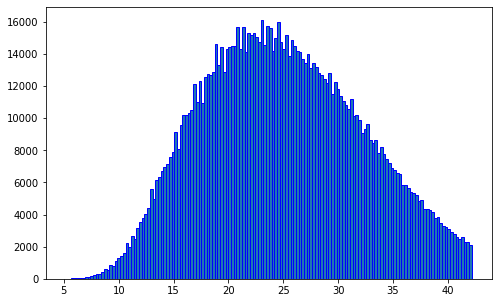

In [ ]:

plt.figure(figsize=(8,5))
plt.hist(np.sqrt(df_f['trip_duration']),bins=150,edgecolor="b")
plt.show()


In [ ]:
# saving newly normal data
df_f['trip_duration']=np.sqrt(df_f['trip_duration'])

checking outlier in Distance

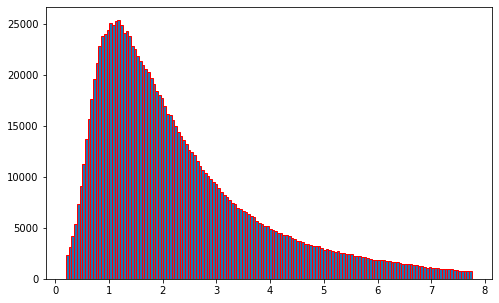

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_f['distance'],bins=150,edgecolor="r")
plt.show()


Form Above PLot we can see distance is also Positively Skewed

we will try with log 10 transformation

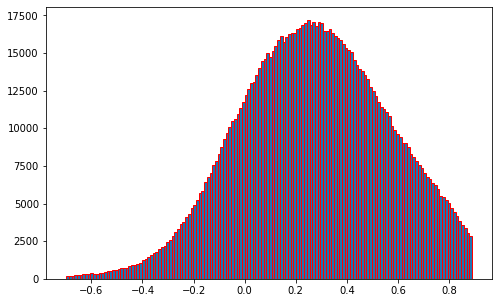

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(np.log10(df_f['distance']),bins=150,edgecolor="r")
plt.show()

In [ ]:
# saving newly normal data
df_f['distance']=np.log10(df_f['distance'])

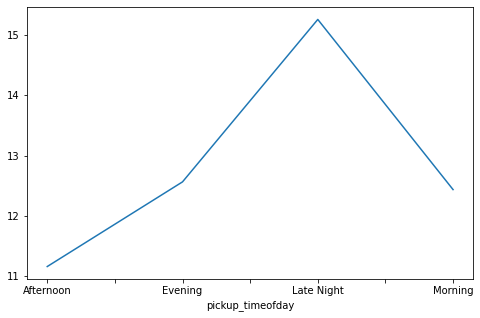

In [ ]:
#average speed by time of Day
plt.figure(figsize=(8,5))
speed_by_timeday=df_f.groupby('pickup_timeofday')['speed_kmph'].mean()
speed_by_timeday.plot()

From above polt we can se speed at night is high ,which is obvious due to less traffic in Night so it will help to reach in less time

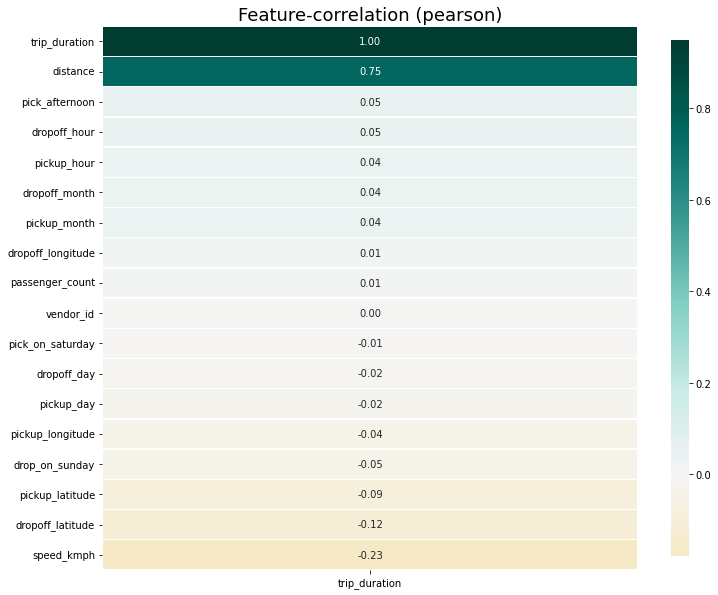

In [ ]:
klib.corr_plot(df_f, target=df_f['trip_duration'])

In [ ]:
df_f.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,pick_afternoon,drop_on_sunday,pick_on_saturday,speed_kmph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,21.330729,0.176720,0,0,17,17,3,3,Evening,Evening,0,0,0,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,25.748786,0.257357,6,6,0,0,6,6,Late Night,Late Night,0,1,0,9.820778


# Visualizing Data

1. visualizing data w.r.t Date

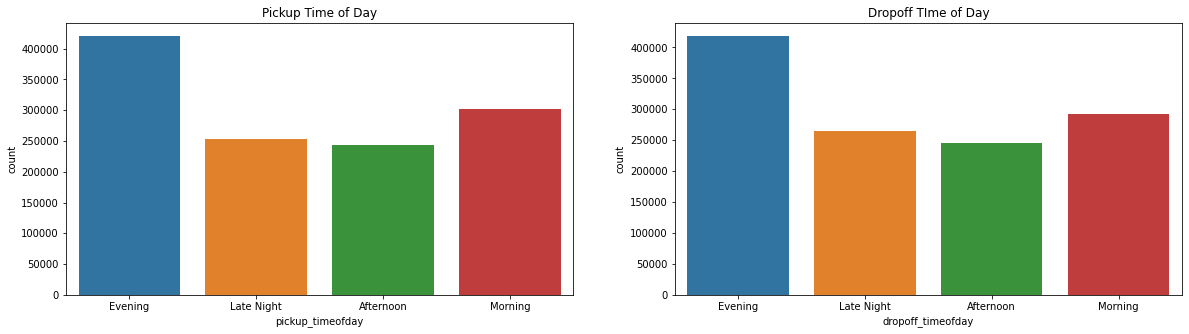

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df_f,ax=ax3)
ax4.set_title('Dropoff TIme of Day')
ax=sns.countplot(x='dropoff_timeofday',data=df_f,ax=ax4)

2.duration VS. pickup hour in given months 


Text(0, 0.5, 'mean(trip_duration)')

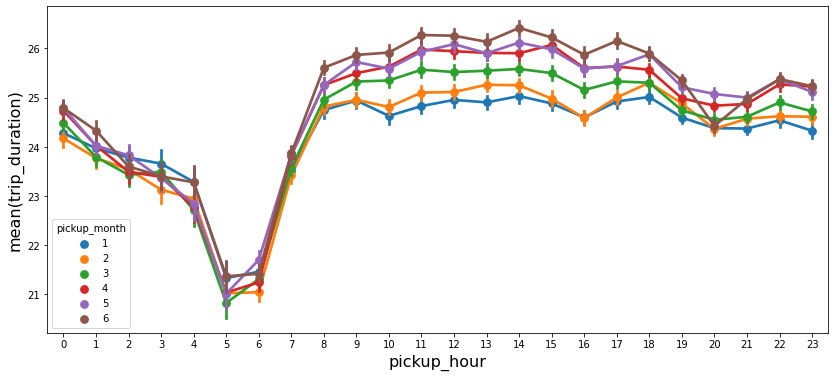

In [ ]:

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=df_f,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

In [ ]:
df_f.groupby('vendor_id')['speed_kmph'].mean()

vendor_id
1    12.800602
2    12.819933
Name: speed_kmph, dtype: float64

Text(0, 0.5, 'mean(Trip Duration)')

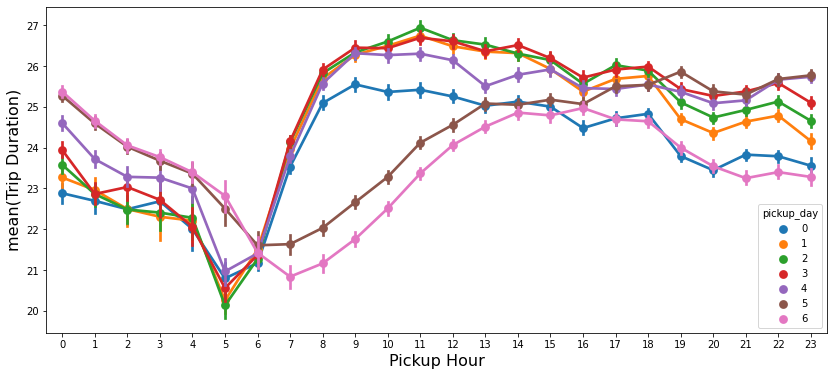

In [ ]:
#  duration VS. pickup hour in weekdays 
plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=df_f,hue='pickup_day')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('mean(Trip Duration)',fontsize=16)

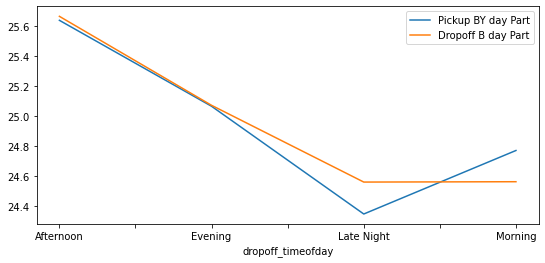

In [ ]:
time_by_pick_tod=df_f.groupby('pickup_timeofday')['trip_duration'].mean()
time_by_drop_tod=df_f.groupby('dropoff_timeofday')['trip_duration'].mean()
plt.figure(figsize=(9,4))
time_by_pick_tod.plot()
time_by_drop_tod.plot()
plt.legend(["Pickup BY day Part", "Dropoff B day Part"], loc ="upper right")

From above plot we can see at late night traffic is less


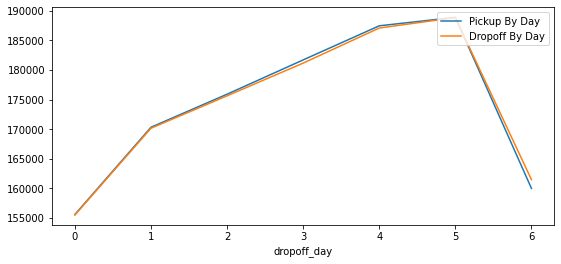

In [ ]:
time_by_pick_day=df_f.groupby('pickup_day')['id'].count()
time_by_drop_day=df_f.groupby('dropoff_day')['id'].count()
plt.figure(figsize=(9,4))
time_by_pick_day.plot()
time_by_drop_day.plot()
plt.legend(["Pickup By Day", "Dropoff By Day"], loc ="upper right")

From above plot we can see Friday and Saturday are the most busiest Days

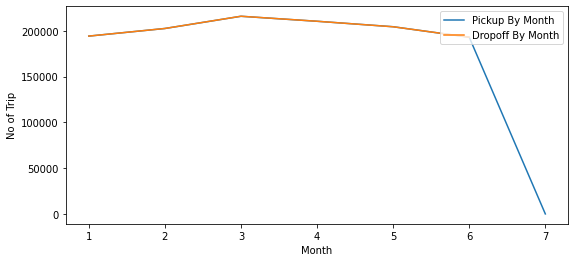

In [ ]:
time_by_pick_month=df_f.groupby('pickup_month')['id'].count()
time_by_drop_month=df_f.groupby('dropoff_month')['id'].count()
plt.figure(figsize=(9,4))
plt.xlabel('Month')
plt.ylabel('No of Trip')
plt.plot(time_by_drop_month)
plt.plot(time_by_pick_month)
plt.legend(["Pickup By Month", "Dropoff By Month"], loc ="upper right")


From above plot we can see in the 7th month there are very less no of trips

2.visualizing data w.r.t Passenger

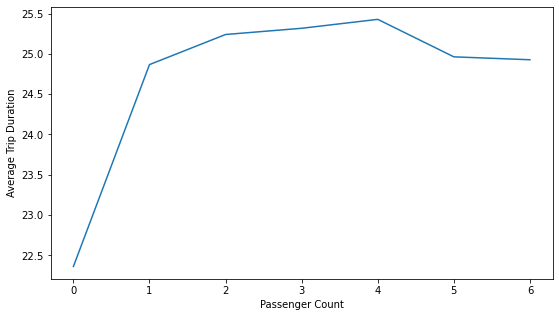

In [ ]:
passenger_by_time=df_f.groupby('passenger_count')['trip_duration'].mean()
plt.rcParams["figure.figsize"] = (9,5)
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Duration')
plt.plot(passenger_by_time)

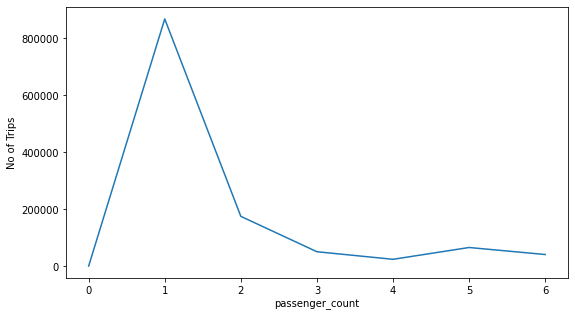

In [ ]:
no_of_passenger=df_f.groupby('passenger_count')['id'].count()
plt.xlabel('Passenger Count')
plt.ylabel('No of Trips')
no_of_passenger.plot()

3.Analysing  Lattitude and Longitude


Text(0.5, 1.0, 'Taxi Trip Dropoffs (Long,Lat)')

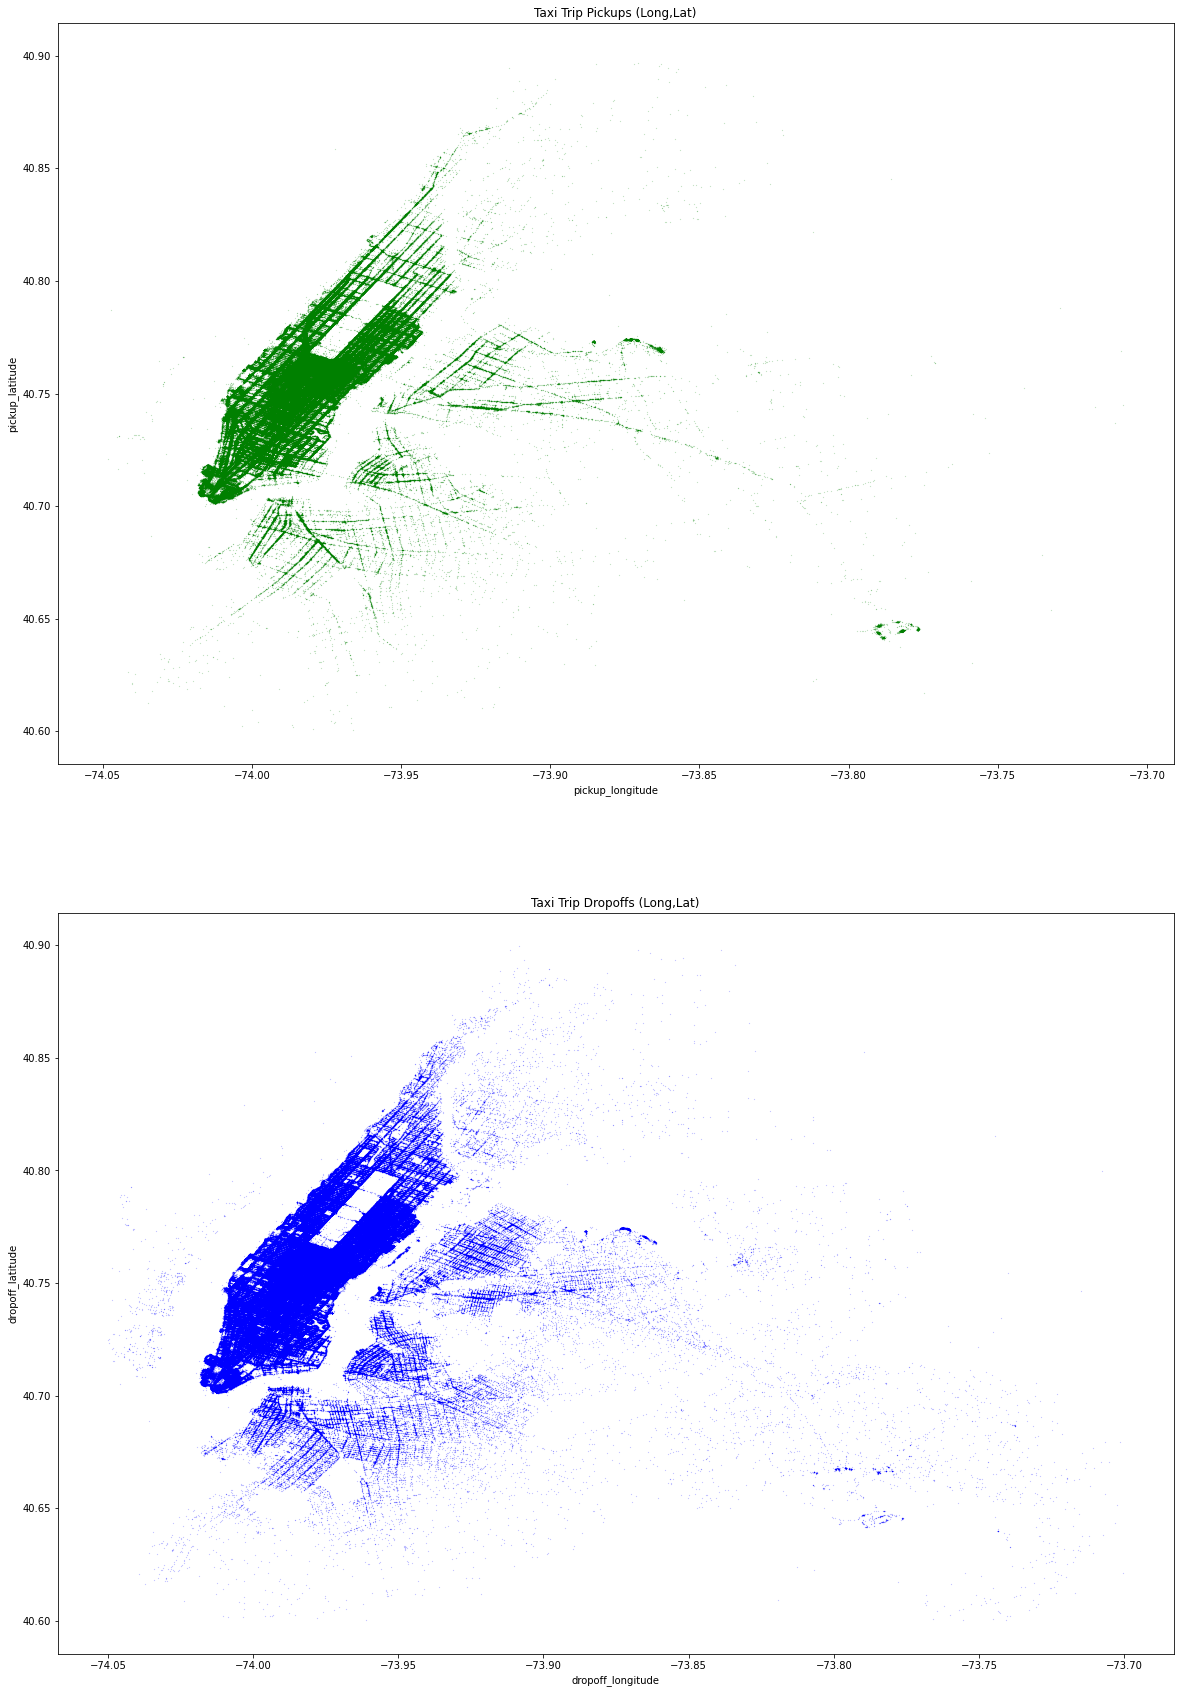

In [ ]:
# Plot for showing the Pickup and Dropoff locations separately for every taxi trip in NYC.
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,30))

df_f.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='green', s=0.02, alpha=0.6, subplots=True, ax=ax1)
df_f.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='blue', s=0.02, alpha=0.6, subplots=True, ax=ax2)
ax1.set_title('Taxi Trip Pickups (Long,Lat)')
ax2.set_title('Taxi Trip Dropoffs (Long,Lat)')

# Preparing Data for Modeling

In [ ]:
df_f=pd.get_dummies(df_f,columns=['pickup_timeofday'])

In [ ]:
dependent=['trip_duration']
independent=set(list(df_f.columns))-set(['trip_duration','id','store_and_fwd_flag',
                                   'pick_afternoon','pick_on_saturday',
                                   'pickup_datetime','drop_on_sunday',
                                   'dropoff_datetime','vendor_id','dropoff_month',
                                   'dropoff_hour','dropoff_day','dropoff_timeofday','pickup_timeofday',
                                    'dropoff_datetime','dropoff_latitude','dropoff_longitude','pickup_hour'])
independent=list(independent)
independent

['pickup_timeofday_Afternoon',
 'distance',
 'pickup_longitude',
 'pickup_latitude',
 'speed_kmph',
 'pickup_day',
 'pickup_timeofday_Late Night',
 'passenger_count',
 'pickup_timeofday_Evening',
 'pickup_month',
 'pickup_timeofday_Morning']

In [ ]:
df_f[independent].head()

,pickup_timeofday_Afternoon,distance,pickup_longitude,pickup_latitude,speed_kmph,pickup_day,pickup_timeofday_Late Night,passenger_count,pickup_timeofday_Evening,pickup_month,pickup_timeofday_Morning
0,0,0.176720,-73.982155,40.767937,11.885316,0,0,1,1,3,0
1,0,0.257357,-73.980415,40.738564,9.820778,6,1,1,0,6,0
3,0,0.171326,-74.010040,40.719971,12.450063,2,0,1,1,4,0
4,1,0.074464,-73.973053,40.793209,9.823760,5,0,1,0,3,0
5,0,0.041245,-73.982857,40.742195,8.936004,5,1,6,0,1,0


In [ ]:
dependent='trip_duration'

In [ ]:
# Create a list of independent variables
x=df_f[independent].values
y=df_f[dependent].values
x

array([[ 0.00000000e+00,  1.76719615e-01, -7.39821548e+01, ...,
         1.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.57356926e-01, -7.39804153e+01, ...,
         0.00000000e+00,  6.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.71326333e-01, -7.40100403e+01, ...,
         1.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  8.88762835e-02, -7.39822006e+01, ...,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  3.84309895e-02, -7.39820786e+01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  5.44810159e-02, -7.39795380e+01, ...,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00]])

# Linear Regression

In [ ]:

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#transforming data

In [ ]:
x_train[0:1]

array([[-0.49999744, -0.04975149, -0.73712294, -0.88277903,  0.00352544,
        -1.5647402 , -0.51145255, -0.50408666,  1.3785112 ,  0.2991391 ,
        -0.57406073]])

In [ ]:
#fitting linear regression
lin_regressor=LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_regressor.score(x_train, y_train)

0.919726607644128

In [ ]:
lr_y_pred_train = lin_regressor.predict(x_train)
lr_y_pred_test = lin_regressor.predict(x_test)

Text(0.5, 1.0, 'Test VS Prediction')

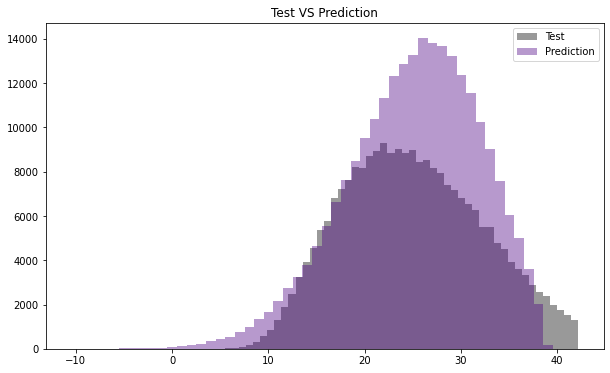

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")
plt.subplot(1,1,1)
sns.distplot(lr_y_pred_test, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

The Gap diffrence in both the graph is the error

### Linear Regression Model Evaluation

#### 1.Linear Regression Model Evaluation(Train Data)

In [ ]:
lr_train_mse  = mean_squared_error((y_train), (lr_y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_r2 = r2_score((y_train), (lr_y_pred_train))
print("Train R2 :" ,lr_train_r2)


Train MSE : 4.162210772882679
Train R2 : 0.919726607644128


#### 2.Linear Regression Model Evaluation(Test Data)

In [ ]:
lr_test_mse  = mean_squared_error((y_test), (lr_y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_r2 = r2_score((y_test), (lr_y_pred_test))
print("Test R2 :" ,lr_test_r2)

Test MSE : 4.197513668360285
Test R2 : 0.9191166851384415


# Lasso Regression

In [ ]:
lasso=Lasso(max_iter=500)
parameter={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameter,scoring='r2',cv=2)

In [ ]:
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=Lasso(max_iter=500),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
pram=lasso_regressor.best_estimator_.coef_


In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}
The R2 score using the same alpha is : 0.9197230134674774


In [ ]:
lasso_regressor.score(x_train,y_train)

0.9197266144963446

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(x_train)
y_pred_lasso_test = lasso_regressor.predict(x_test)

Text(0.5, 1.0, 'Test VS Prediction')

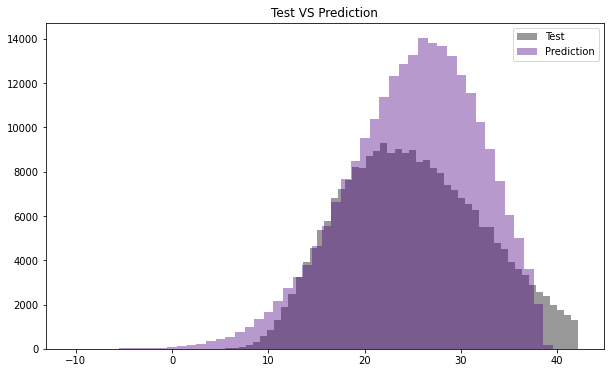

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_lasso_test, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

The Gap diffrence in both the graph is the error

### Lasso Regression Model Evaluation 

#### 1.Lasso Regression Model Evaluation(Train Data)

In [ ]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

Train MSE : 4.162210417592226
Train R2 : 0.9197266144963446


#### 2.Lasso Regression Model Evaluation(Test Data)

In [ ]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

Test MSE : 4.197518008520802
Test R2 : 0.919116601506416


# Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,500,600,700,800,900,1000,5000,6000,10000,12000,15000,20000,30000,50000,100000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100, 500, 600, 700, 800,
                                   900, 1000, 5000, 6000, 10000, 12000, 15000,
                                   20000, 30000, 50000, 100000]},
             scoring='r2')

In [ ]:
ridge_regressor.best_estimator_.coef_

array([ 6.98662332e-02,  7.39405780e+00,  8.52951549e-02, -6.47214450e-02,
       -4.74829277e+00, -4.22091766e-02, -1.81763710e-02,  6.97818387e-03,
       -6.65401098e-02,  7.87668116e-02,  2.55897791e-02])

In [ ]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}
The R2 score using the same alpha is : 0.9197238263568561


# Ridge Regression Model Evaluation

In [ ]:
y_pred_ridge_train=ridge_regressor.predict(x_train)
y_pred_ridge_test=ridge_regressor.predict(x_test)

Text(0.5, 1.0, 'Test VS Prediction')

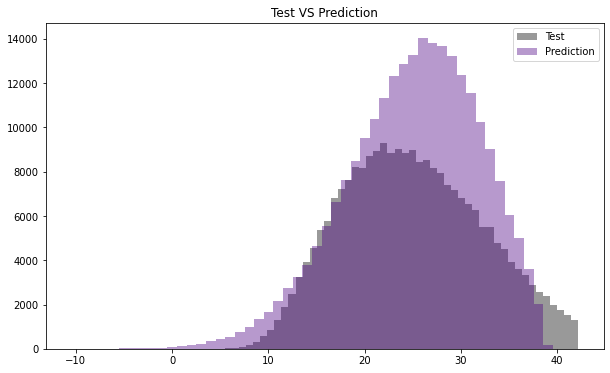

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_ridge_test, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

The Gap diffrence in both the graph is the error

#### 1.Ridge Regression Model Evaluation(Train Data)

In [ ]:
ridge_train_mse=mean_squared_error(y_train,y_pred_ridge_train)
print("Train MSE :",ridge_train_mse)
ridge_train_r2=r2_score(y_train,y_pred_ridge_train)
print("Train R2 :",ridge_train_r2)

Train MSE : 4.1622104166168565
Train R2 : 0.9197266145151558


#### 2.Ridge Regression Model Evaluation(Test Data)

In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

Test MSE : 4.197518220359982
Test R2 : 0.9191165974244151


##### Models Summary for the Train data

In [ ]:
models=['Linear Regression','Lasso Regression','Ridge Regression']
train_mse=[lr_train_mse, lasso_train_mse, ridge_train_mse]
train_r2=[lr_train_r2, lasso_train_r2, ridge_train_r2]

In [ ]:

importance_df= pd.DataFrame({'Features': independent,
                             'Feature_importance': list(ridge_regressor.best_estimator_.coef_)})
importance_df


,Features,Feature_importance
0,pickup_timeofday_Afternoon,0.069866
1,distance,7.394058
2,pickup_longitude,0.085295
3,pickup_latitude,-0.064721
4,speed_kmph,-4.748293
5,pickup_day,-0.042209
6,pickup_timeofday_Late Night,-0.018176
7,passenger_count,0.006978
8,pickup_timeofday_Evening,-0.066540
9,pickup_month,0.078767


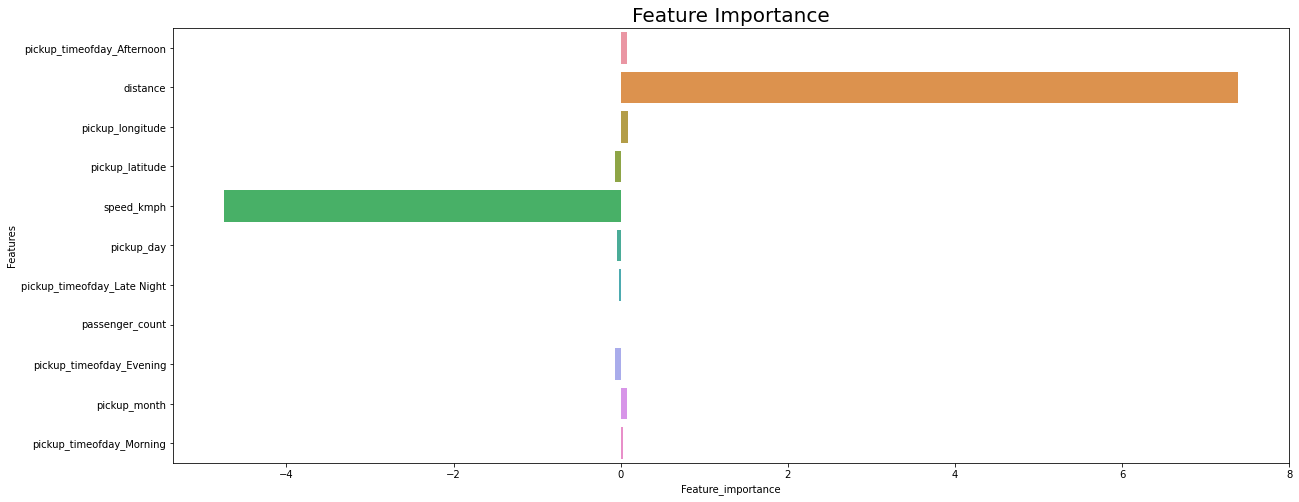

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x="Feature_importance",y='Features', data=importance_df, orient = 'h')
plt.show()


In [ ]:
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2]

In [ ]:
model_comparision=pd.DataFrame({'Model':models,
                                'Train MSE':train_mse,
                                'Train R^2':train_r2,
                                'Test MSE':test_mse,
                                'Test R^2':test_r2})
model_comparision

,Model,Train MSE,Train R^2,Test MSE,Test R^2
0,Linear Regression,4.162211,0.919727,4.197514,0.919117
1,Lasso Regression,4.162210,0.919727,4.197518,0.919117
2,Ridge Regression,4.162210,0.919727,4.197518,0.919117


# Conclusion
1.We can see that MSE and R2 which are the metrics used to evaluate the performance of model **Linear,Lasso and Ridge Regression**.


2.We can use any of the Model for the Predection the trip of a particular taxi